In [37]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AMOUSSOU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AMOUSSOU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# Importation des données
data= pd.read_csv("translated_McDonald_s_Reviews.csv")
data.head()

,review,rating,cleaned_review,token_length,translated_reviews
0,Why does it look like someone spit on my food?...,1 star,Why does it look like someone spit on my food?...,62,Pourquoi il ressemble à quelqu'un cracher sur ...
1,It'd McDonalds. It is what it is as far as the...,4 stars,It would McDonalds. It is what it is as far as...,53,Il serait McDonalds. C'est ce qu'il est en ce ...
2,Made a mobile order got to the speaker and che...,1 star,Made a mobile order got to the speaker and che...,77,Je n'ai jamais obtenu le remboursement dans l'...
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,My mc. Crispy chicken sandwich was customer s...,17,Mon Mc. Crispy sandwich au poulet était servic...
4,"I repeat my order 3 times in the drive thru, a...",1 star,"I repeat my order 3 times in the drive thru, a...",78,Je répète ma commande 3 fois dans le drive thr...


In [22]:
data.isnull().sum()

review                 0
rating                 0
cleaned_review        48
token_length           0
translated_reviews     0
dtype: int64

In [23]:
data = data.dropna(subset=['cleaned_review'])

data.isnull().sum()

review                0
rating                0
cleaned_review        0
token_length          0
translated_reviews    0
dtype: int64

# **Prétraitement des données**

In [24]:
# Création d'une nouvelle variable "feeling" en recatégorisant "rating"
def categorize_rating(rating):
    if rating in ['1 star', '2 stars']:
        return 'negative'
    elif rating == '3 stars':
        return 'neutre'
    else:
        return 'positive'

# Application de la fonction sur une nouvelle colonne "feeling"
data['feeling'] = data['rating'].apply(categorize_rating)

data.head()

,review,rating,cleaned_review,token_length,translated_reviews,feeling
0,Why does it look like someone spit on my food?...,1 star,Why does it look like someone spit on my food?...,62,Pourquoi il ressemble à quelqu'un cracher sur ...,negative
1,It'd McDonalds. It is what it is as far as the...,4 stars,It would McDonalds. It is what it is as far as...,53,Il serait McDonalds. C'est ce qu'il est en ce ...,positive
2,Made a mobile order got to the speaker and che...,1 star,Made a mobile order got to the speaker and che...,77,Je n'ai jamais obtenu le remboursement dans l'...,negative
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,My mc. Crispy chicken sandwich was customer s...,17,Mon Mc. Crispy sandwich au poulet était servic...,positive
4,"I repeat my order 3 times in the drive thru, a...",1 star,"I repeat my order 3 times in the drive thru, a...",78,Je répète ma commande 3 fois dans le drive thr...,negative


In [29]:
df = pd.DataFrame()
df['review'] = data['cleaned_review']
df['feeling'] = data['feeling']
df.head()

,review,feeling
0,Why does it look like someone spit on my food?...,negative
1,It would McDonalds. It is what it is as far as...,positive
2,Made a mobile order got to the speaker and che...,negative
3,My mc. Crispy chicken sandwich was customer s...,positive
4,"I repeat my order 3 times in the drive thru, a...",negative


In [32]:
df.dtypes

review     object
feeling    object
dtype: object

In [33]:
df.isnull().sum()

review     0
feeling    0
dtype: int64

In [26]:
data.isnull().sum()

review                0
rating                0
cleaned_review        0
token_length          0
translated_reviews    0
feeling               0
dtype: int64

In [8]:
# Suppression des lignes avec des valeurs manquantes dans les colonnes critiques
data = data.dropna(subset=['review', 'feeling'])
data.shape

(33396, 12)

In [37]:
# Division des données en ensemble d'entraînement et de test
X = data['cleaned_review']
y = data['feeling']  # Utilisation de "feeling" comme variable cible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# **Exploration des données**

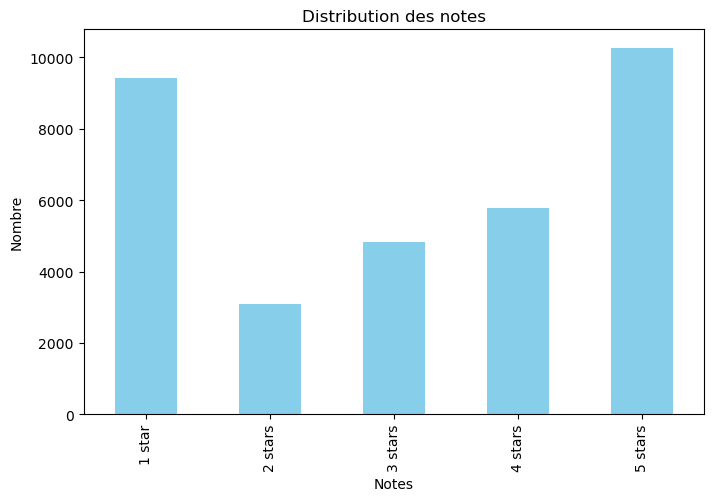

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
data['rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution des notes')
plt.xlabel('Notes')
plt.ylabel('Nombre')
plt.show()

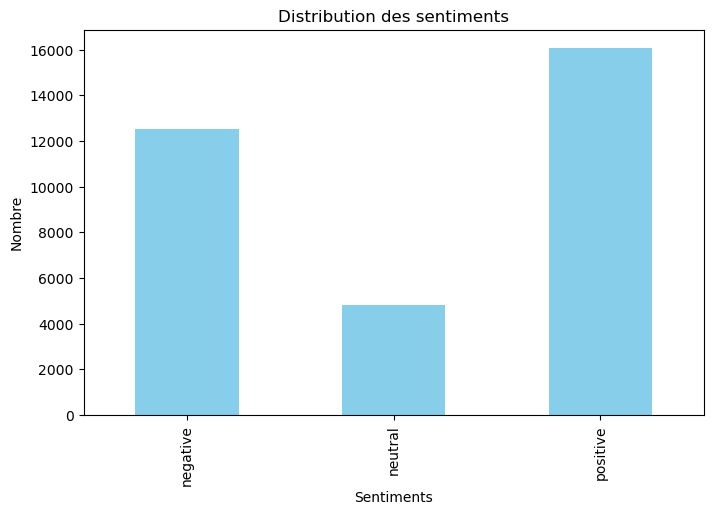

In [39]:
plt.figure(figsize=(8, 5))
data['feeling'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution des sentiments')
plt.xlabel('Sentiments')
plt.ylabel('Nombre')
plt.show()

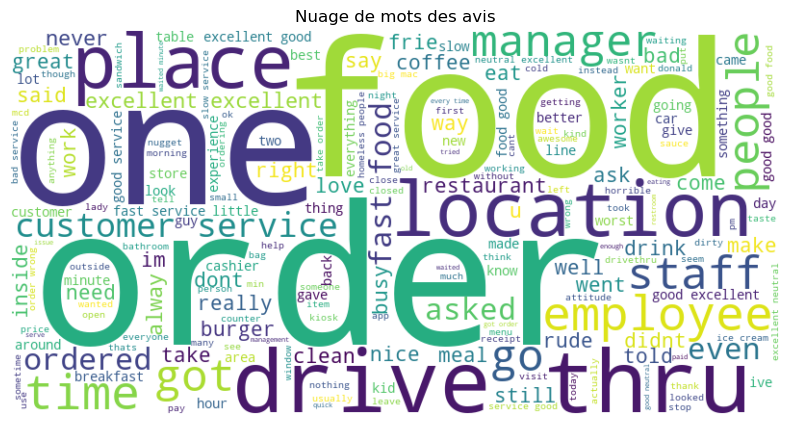

In [40]:
from wordcloud import WordCloud

text = ' '.join([str(item) for item in data['cleaned_review']])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des avis')
plt.show()

# **Mise en oeuvre du NLP**

In [41]:
# Importation des bibliothèques pour le NLP
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [42]:
# Vectorisation
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [43]:
# Entraînement du modèle
model = RandomForestClassifier(random_state=42)
model.fit(X_train_vec, y_train)

RandomForestClassifier(random_state=42)

In [44]:
# Prédiction
y_pred = model.predict(X_test_vec)
# Calcul des probabilités pour chaque classe
y_prob = model.predict_proba(X_test_vec)

In [18]:
# Évaluation
# Calcul de l'AUC pour multi-classes
print(classification_report(y_test, y_pred))
print("AUC : ", roc_auc_score(y_test, y_prob, multi_class='ovr'))

              precision    recall  f1-score   support

    negative       0.82      0.91      0.86      2543
     neutral       0.80      0.41      0.54       939
    positive       0.85      0.90      0.87      3198

    accuracy                           0.83      6680
   macro avg       0.82      0.74      0.76      6680
weighted avg       0.83      0.83      0.82      6680

AUC :  0.919236595679776
